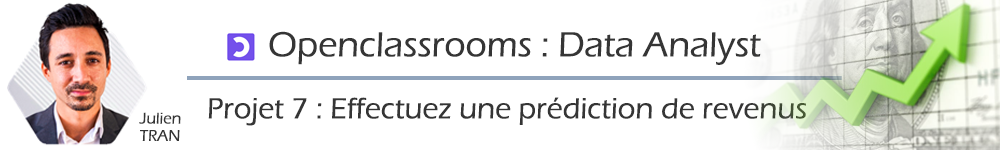

### Mission 3 :

Dans l'état actuel, nous avons à disposition deux des trois variables explicatives souhaitées :

- le revenu moyen du pays
- l'indice de Gini du pays

Il nous manque donc, pour un individu , la classe de revenu de ses parents.

Nous allons donc simuler cette information grâce à un coefficient (propre à chaque pays), mesurant une corrélation entre le revenu de l'individu et le revenu de ses parents. Ce coefficient sera ici appelé coefficient d'élasticité ; il mesure la mobilité intergénérationnelle du revenu.

Pour chaque pays, nous allons utiliser une génération aléatoire de la classe de revenu des parents, à partir de ces seules deux informations :

- rho
- la classe de revenu de l'enfant

### Sommaire // Mission 3 🔮

* [1.Importation des librairies et parametres df](#1)
* [2.Importation des fichiers CSV](#2)
* [3.Determination du coefficient d'elasticite pour chaque pays ](#3)
* [4.Determination de la classe de revenus des parents](#4)
    * [4.1.Creation d'un nouvel échantillion](#4.1)
    * [4.2.Attribution des classes aux 500 individus ](#4.2)
    * [4.3.Création de la colonne revenu moyen par pays (m_j)](#4.3)

## 1.Importation des librairies et parametres df <a class="anchor" id="1"></a>

In [1]:
#j'importe les librairies qui vont me servir plus tard
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from collections import Counter

#Je definis le nombre de lignes max affichées sur None
pd.set_option("max_rows", None) 
pd.set_option("display.precision",7)

## 2.Importation des fichiers CSV <a class="anchor" id="2"></a>

In [2]:
#Je charge tous les fichiers csv
data_projet7_clean = pd.read_csv("C:/Users/33643/Desktop/P7/CSV/data_projet7_clean.csv",decimal=".")
Indice_gini = pd.read_csv("C:/Users/33643/Desktop/P7/CSV/Indice_gini.csv",decimal=".")
coefficient_elasticite = pd.read_csv("C:/Users/33643/Desktop/P7/CSV/GDIMMay2018+.csv",decimal=".")

#J'affiche une phrase si l'import est reussi
print("Fichiers chargés avec succes!")

Fichiers chargés avec succes!


## 3.Determination du coefficient d'elasticite pour chaque pays (rho_j)<a class="anchor" id="3"></a>

In [3]:
coefficient_elasticite.head()

,countryname,wbcode,iso3,region,incgroup2,incgroup4,fragile,survey,year,status,...,Cores2125_MAcatC1,Shortfall0611_obs,Shortfall0611_IGP,Shortfall1217_obs,Shortfall1217_IGP,IGEincome,S1,S2,S3,MLD_psu
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25103.0,0.0861974,18054.0,0.3452242,NaN,NaN,NaN,NaN,0.1
1,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12107.0,0.0832711,8538.0,0.3899521,NaN,NaN,NaN,NaN,0.1
2,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12996.0,0.0891608,9516.0,0.3076873,NaN,NaN,NaN,NaN,0.1
3,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25396.0,0.0504468,18387.0,0.2180616,NaN,NaN,NaN,NaN,0.1
4,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12246.0,0.0479610,8677.0,0.2309089,NaN,NaN,NaN,NaN,0.1


In [4]:
len(coefficient_elasticite['IGEincome'].unique())

76

In [5]:
len(coefficient_elasticite['countryname'].unique())

150

In [6]:
# Restriction de la moyenne des parents et de tous les enfants dans les colonnes parent et child
coefficient_elasticite = coefficient_elasticite.loc[(coefficient_elasticite['parent']=='avg') & (coefficient_elasticite['child']=='all')]
coefficient_elasticite = coefficient_elasticite[['iso3','region','incgroup4','IGEincome']]
coefficient_elasticite = coefficient_elasticite.rename(columns ={'iso3':'ISO3'})
coefficient_elasticite.head()

,ISO3,region,incgroup4,IGEincome
0,AFG,South Asia,Low income,NaN
12,AGO,Sub-Saharan Africa,Upper middle income,NaN
24,ALB,Europe & Central Asia,Upper middle income,NaN
36,ALB,Europe & Central Asia,Upper middle income,NaN
48,ALB,Europe & Central Asia,Upper middle income,NaN


In [7]:
# Je groupe les IGEincome par moyenne region et catégorie pour decouvrir ou se trouve le ou les valeurs NaN
coef_elas_mean = coefficient_elasticite.groupby(['region','incgroup4']).mean().reset_index()
coef_elas_mean

,region,incgroup4,IGEincome
0,East Asia & Pacific,Lower middle income,0.5276652
1,East Asia & Pacific,Upper middle income,0.4695000
2,Europe & Central Asia,Lower middle income,0.4248173
3,Europe & Central Asia,Upper middle income,0.4771710
4,High income,High income,0.3478812
5,Latin America & Caribbean,Lower middle income,0.9407368
6,Latin America & Caribbean,Upper middle income,0.8788523
7,Middle East & North Africa,Lower middle income,0.9164609
8,Middle East & North Africa,Upper middle income,0.5173975
9,South Asia,Low income,0.4360000


#### Un valeur NaN est présente pour le sud de l'Asie et la catégorie 'upper middle income'. Je decide de regarder dans le tableau des valeurs d'IGEincome données pour chaque catégorie en vue d'imputer la bonne valeur.

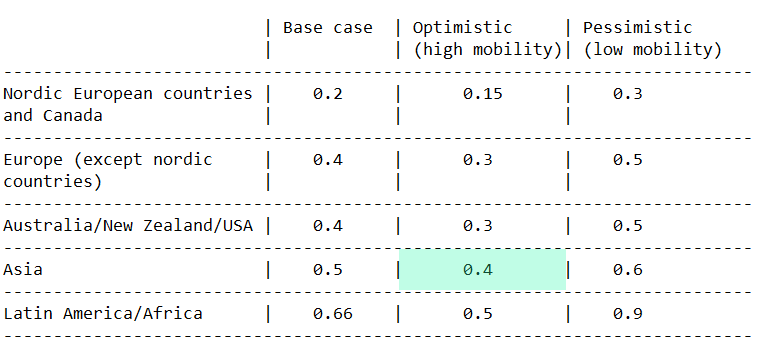

In [8]:
# Je remplace les NaN de la colonne IGEincome par la bonne valeur du tableau
coef_elas_mean['IGEincome'] = coef_elas_mean['IGEincome'].fillna(0.4)

In [9]:
# Je verifie si il y a d'autre NaN
ce_null = coefficient_elasticite[coefficient_elasticite['IGEincome'].isnull()]
ce_null = ce_null.groupby(['ISO3','region','incgroup4']).mean().reset_index()
ce_null

,ISO3,region,incgroup4,IGEincome
0,AFG,South Asia,Low income,NaN
1,AGO,Sub-Saharan Africa,Upper middle income,NaN
2,ALB,Europe & Central Asia,Upper middle income,NaN
3,ARM,Europe & Central Asia,Lower middle income,NaN
4,AUS,High income,High income,NaN
5,AUT,High income,High income,NaN
6,AZE,Europe & Central Asia,Upper middle income,NaN
7,BEL,High income,High income,NaN
8,BFA,Sub-Saharan Africa,Low income,NaN
9,BGD,South Asia,Lower middle income,NaN


In [10]:
# Je remplace les NaN de la colonne IGEincome pour leur affecter une nouvelle valeur
#coefficient_elasticite['IGEincome'] = coefficient_elasticite['IGEincome'].fillna(0)

# Je remplace les NaN de la colonne IGEincome par la moyenne correspondante à chaque catégorie pour chaque pays
coefficient_elasticite.loc[(coefficient_elasticite['region'] == 'South Asia') & (coefficient_elasticite['incgroup4'] == 'Low income'), 'IGEincome'] = 0.436
coefficient_elasticite.loc[(coefficient_elasticite['region'] == 'South Asia') & (coefficient_elasticite['incgroup4'] == 'Lower middle income'), 'IGEincome'] = 0.523
coefficient_elasticite.loc[(coefficient_elasticite['region'] == 'South Asia') & (coefficient_elasticite['incgroup4'] == 'Upper middle income'), 'IGEincome'] = 0.4

coefficient_elasticite.loc[(coefficient_elasticite['region'] == 'Sub-Saharan Africa') & (coefficient_elasticite['incgroup4'] == 'Upper middle income'), 'IGEincome'] = 0.677
coefficient_elasticite.loc[(coefficient_elasticite['region'] == 'Sub-Saharan Africa') & (coefficient_elasticite['incgroup4'] == 'Low income'), 'IGEincome'] = 0.646
coefficient_elasticite.loc[(coefficient_elasticite['region'] == 'Sub-Saharan Africa') & (coefficient_elasticite['incgroup4'] == 'Lower middle income'), 'IGEincome'] = 0.629

coefficient_elasticite.loc[(coefficient_elasticite['region'] == 'Europe & Central Asia') & (coefficient_elasticite['incgroup4'] == 'Upper middle income'), 'IGEincome'] = 0.477
coefficient_elasticite.loc[(coefficient_elasticite['region'] == 'Europe & Central Asia') & (coefficient_elasticite['incgroup4'] == 'Lower middle income'), 'IGEincome'] = 0.424

coefficient_elasticite.loc[(coefficient_elasticite['region'] == 'High income') & (coefficient_elasticite['incgroup4'] == 'High income'), 'IGEincome'] = 0.347

coefficient_elasticite.loc[(coefficient_elasticite['region'] == 'Latin America & Caribbean') & (coefficient_elasticite['incgroup4'] == 'Lower middle income'), 'IGEincome'] = 0.94
coefficient_elasticite.loc[(coefficient_elasticite['region'] == 'Latin America & Caribbean') & (coefficient_elasticite['incgroup4'] == 'Upper middle income'), 'IGEincome'] = 0.878

coefficient_elasticite.loc[(coefficient_elasticite['region'] == 'East Asia & Pacific') & (coefficient_elasticite['incgroup4'] == 'Upper middle income'), 'IGEincome'] = 0.469
coefficient_elasticite.loc[(coefficient_elasticite['region'] == 'East Asia & Pacific') & (coefficient_elasticite['incgroup4'] == 'Lower middle income'), 'IGEincome'] = 0.527

coefficient_elasticite.loc[(coefficient_elasticite['region'] == 'Middle East & North Africa') & (coefficient_elasticite['incgroup4'] == 'Lower middle income'), 'IGEincome'] = 0.916
coefficient_elasticite.loc[(coefficient_elasticite['region'] == 'Middle East & North Africa') & (coefficient_elasticite['incgroup4'] == 'Upper middle income'), 'IGEincome'] = 0.517

In [11]:
# Je verifie si il y a d'autre NaN
ce_null2 = coefficient_elasticite[coefficient_elasticite['IGEincome'].isnull()]
ce_null2 = ce_null2.groupby(['ISO3','region','incgroup4']).mean().reset_index()
ce_null2

,ISO3,region,incgroup4,IGEincome


## <font color='red'> Lors de la mission 4 je me suis rendu compte que le Costa rica manquait à mes pays, apres une breve recherche il s'avere que le Costa Rica ne faisait pas partie de la table coefficient_elasticite, je decide donc je rajouter une ligne pour ce pays </font>

In [12]:
# Création de la ligne manquante
RiRica = pd.DataFrame({'ISO3' :  ['CRI'],
                        'region' : ['Latin America & Caribbean'],
                        'incgroup4' : ['Lower middle income'],
                        'IGEincome' : [0.94]})
RiRica

,ISO3,region,incgroup4,IGEincome
0,CRI,Latin America & Caribbean,Lower middle income,0.94


In [13]:
# Concaténation avec la talbe coefficient_elasticite
coefficient_elasticite = pd.concat([coefficient_elasticite, RiRica], ignore_index=True)
coefficient_elasticite.tail()

,ISO3,region,incgroup4,IGEincome
527,ZAF,Sub-Saharan Africa,Upper middle income,0.677
528,ZAF,Sub-Saharan Africa,Upper middle income,0.677
529,ZAF,Sub-Saharan Africa,Upper middle income,0.677
530,ZMB,Sub-Saharan Africa,Lower middle income,0.629
531,CRI,Latin America & Caribbean,Lower middle income,0.940


In [14]:
# Je merge coef_elas_mean avec coefficient_elasticite
coef_elas_2 = pd.merge(coefficient_elasticite,coef_elas_mean, on = ['region','incgroup4'])
coef_elas_2 = coef_elas_2.groupby('ISO3').mean()
coef_elas_2 = coef_elas_2.reset_index()
coef_elas_2 = coef_elas_2.drop(columns =['IGEincome_x'])
coef_elas_2 = coef_elas_2.rename(columns ={'IGEincome_y':'IGEincome'})

coef_elas_2.head()

,ISO3,IGEincome
0,AFG,0.4360000
1,AGO,0.6770000
2,ALB,0.4771710
3,ARM,0.4248173
4,AUS,0.3478812


In [15]:
Country_list22 = coef_elas_2['ISO3'].unique()
Country_list22

array(['AFG', 'AGO', 'ALB', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BFA',
       'BGD', 'BGR', 'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'BWA', 'CAF',
       'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COG', 'COL', 'COM',
       'CPV', 'CRI', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'ECU', 'EGY',
       'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'GAB', 'GBR', 'GEO',
       'GHA', 'GIN', 'GNB', 'GRC', 'GTM', 'HRV', 'HUN', 'IDN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KIR', 'KOR', 'KSV', 'LAO', 'LBN', 'LBR',
       'LKA', 'LSO', 'LTU', 'LVA', 'MAR', 'MDA', 'MDG', 'MDV', 'MEX',
       'MKD', 'MLI', 'MNE', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS',
       'NAM', 'NER', 'NGA', 'NLD', 'NOR', 'NPL', 'NZL', 'PAK', 'PAN',
       'PER', 'PHL', 'PNG', 'POL', 'PRT', 'PSE', 'ROU', 'RUS', 'RWA',
       'SDN', 'SEN', 'SLE', 'SRB', 'SSD', 'STP', 'SVK', 'SVN', 'SWE',
       'SWZ', 'TCD', 'TGO', 'THA', 'TJK', 'TLS', 'TON', 'TUN', 'TUR',
       'TUV', 'TWN',

In [16]:
data_projet7_clean.head()

,Country,ISO3,Year,Population,quantile,nb_quantiles,income,gdpppp,gini
0,Albania,ALB,2008,3002678.0,1,100,728.89795,7297.0,29.98
1,Albania,ALB,2008,3002678.0,2,100,916.66235,7297.0,29.98
2,Albania,ALB,2008,3002678.0,3,100,1010.91600,7297.0,29.98
3,Albania,ALB,2008,3002678.0,4,100,1086.90780,7297.0,29.98
4,Albania,ALB,2008,3002678.0,5,100,1132.69970,7297.0,29.98


In [17]:
# Je merge les tables GDIMMay2018 et data_projet7_clean
data_projet7_clean_m3 = pd.merge(data_projet7_clean,coef_elas_2, on= ['ISO3'])
data_projet7_clean_m3.head()

,Country,ISO3,Year,Population,quantile,nb_quantiles,income,gdpppp,gini,IGEincome
0,Albania,ALB,2008,3002678.0,1,100,728.89795,7297.0,29.98,0.477171
1,Albania,ALB,2008,3002678.0,2,100,916.66235,7297.0,29.98,0.477171
2,Albania,ALB,2008,3002678.0,3,100,1010.91600,7297.0,29.98,0.477171
3,Albania,ALB,2008,3002678.0,4,100,1086.90780,7297.0,29.98,0.477171
4,Albania,ALB,2008,3002678.0,5,100,1132.69970,7297.0,29.98,0.477171


In [18]:
data_projet7_clean_m3.shape

(10400, 10)

In [19]:
len(data_projet7_clean_m3['Country'].unique())

104

In [20]:
print(data_projet7_clean_m3.isnull().any())

Country         False
ISO3            False
Year            False
Population      False
quantile        False
nb_quantiles    False
income          False
gdpppp          False
gini            False
IGEincome       False
dtype: bool


In [21]:
print(data_projet7_clean_m3.duplicated().any())
print(data_projet7_clean_m3.duplicated().sum())

False
0


## 4.Determination de la classe de revenus des parents (c_i_parent) <a class="anchor" id="4"></a>

### Classe de revenu des enfants (c_i_child) entre 1 et 100, idem pour les parents

### probabilités (P(c_i_parent | c_i_child, j)

In [22]:
def generate_incomes(n, pj):
    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
    ln_y_parent = st.norm(0,1).rvs(size=n)
    # Génération d'une réalisation du terme d'erreur epsilon
    residues = st.norm(0,1).rvs(size=n)
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)
    
def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib   

def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat) 

def plot_conditional_distributions(p, cd, nb_quantiles):
    plt.figure()
    
    # La ligne suivante sert à afficher un graphique en "stack bars", sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("p=" + str(p))
    plt.legend()
    plt.xlabel("quantile parents")
    plt.ylabel("probabilité du quantile enfant")
    plt.show()
    
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]

pj = 0.9 # coefficient d'élasticité du pays j  
nb_quantiles = 100 # nombre de quantiles (nombre de classes de revenu)  
n = 1000*nb_quantiles # taille de l'échantillon  
y_child, y_parents = generate_incomes(n, pj)  
sample = compute_quantiles(y_child, y_parents, nb_quantiles)  
cd = conditional_distributions(sample, nb_quantiles)  
plot_conditional_distributions(pj, cd, nb_quantiles) # Cette instruction prendra du temps si nb_quantiles > 10  
print(cd)  
c_i_child = 5  
c_i_parent = 8  
p = proba_cond(c_i_parent, c_i_child, cd)  
#print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child,pj, p))  

generate_incomes(n,pj)  

## 4.1.Création d'un nouvel échantillon <a class="anchor" id="4.1"></a>

In [23]:
df_500 = pd.concat([data_projet7_clean_m3]*500, ignore_index=True)

print('data_projet7_clean_m3 shape :', data_projet7_clean_m3.shape)
print('df_500 shape :', df_500.shape)

data_projet7_clean_m3 shape : (10400, 10)
df_500 shape : (5200000, 10)


In [24]:
df_500.head(2)

,Country,ISO3,Year,Population,quantile,nb_quantiles,income,gdpppp,gini,IGEincome
0,Albania,ALB,2008,3002678.0,1,100,728.89795,7297.0,29.98,0.477171
1,Albania,ALB,2008,3002678.0,2,100,916.66235,7297.0,29.98,0.477171


In [25]:
# Je rename mes colonnes avec les noms cités dans le texte du projet 
df_500.rename(columns={'quantile': 'c_i_child', 'income': 'y_child', 'gini': 'G_j', 'IGEincome': 'p_j'}, inplace=True)
df_500 = df_500[['Country','ISO3', 'c_i_child', 'y_child', 'G_j', 'p_j']]

df_500.head(2)

,Country,ISO3,c_i_child,y_child,G_j,p_j
0,Albania,ALB,1,728.89795,29.98,0.477171
1,Albania,ALB,2,916.66235,29.98,0.477171


## 4.2.Attribution des classes aux 500 individus <a class="anchor" id="4.2"></a>

#### Je créé une liste des pays uniques dans ma table df_500 pour ensuite calculer la probabilité conditionnelle associée à chaque pays.

In [26]:
Country_list = df_500['Country'].unique()
len(Country_list)

104

In [27]:
# creation d'un variable quantile parents, à remplir
list_proba = []

In [28]:
%%time
#temps d'execution

for Country in Country_list :
    pj = df_500.loc[df_500['Country']== Country,'p_j'].iloc[0] # coeff d'elasticité pour chaque pays de df_500 dans la liste Country_list, premiere ligne
    nb_quantiles = 100 # nombre de quantiles (nombre de classes de revenu)
    n = 50000 # taille de l'échantillon
    y_child, y_parents = generate_incomes(n, pj) # Génération de revenus selons une loi normale
    sample = compute_quantiles(y_child, y_parents, nb_quantiles) # Retourne un df avec y_child, y_parents, c_i_child, c_i_parents
    cd = conditional_distributions(sample, nb_quantiles)  # On compte chaque combinaison c_i_child, c_i_parent
    for c_i_child in range(100):
        for c_i_parent in range(100):
            p = proba_cond(c_i_parent, c_i_child, cd)
            #print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child,pj,p))
            list_proba.extend([c_i_parent+1]*(int(p*500)))

Wall time: 11min 19s


In [29]:
len(sample)

50000

In [30]:
sample.head()

,y_child,y_parents,c_i_child,c_i_parent
0,3.7605471,2.5146994,87,83
1,0.2545714,0.5687981,13,29
2,0.1400881,0.6329341,6,33
3,0.1098572,0.1816247,4,5
4,0.2855594,0.5794992,15,30


In [31]:
# Tres forte mobilité
p

0.18

In [32]:
# Je check que ma liste à le meme nombre de ligne que mon df_500
len(list_proba)

5200000

In [33]:
# Je créé une colonne dans mon df_500 pour la classe parents
df_500['proba'] = list_proba
df_500 = df_500.rename({'proba':'c_i_parent'},axis=1)

In [34]:
df_500.head()

,Country,ISO3,c_i_child,y_child,G_j,p_j,c_i_parent
0,Albania,ALB,1,728.89795,29.98,0.477171,1
1,Albania,ALB,2,916.66235,29.98,0.477171,1
2,Albania,ALB,3,1010.91600,29.98,0.477171,1
3,Albania,ALB,4,1086.90780,29.98,0.477171,1
4,Albania,ALB,5,1132.69970,29.98,0.477171,1


## 4.3.Création de la colonne revenu moyen par pays (m_j) <a class="anchor" id="4.3"></a>

In [35]:
# Création d'un dataframe avec la variable revenu moyen par pays m_j
Revenu_moyen_pays = df_500.groupby(by='Country').mean()
Revenu_moyen_pays.reset_index(inplace=True)
Revenu_moyen_pays = Revenu_moyen_pays[['Country', 'y_child']]
Revenu_moyen_pays.rename(columns={'y_child': 'm_j'}, inplace=True)

Revenu_moyen_pays.head(2)

,Country,m_j
0,Albania,2994.8299020
1,Armenia,1628.3827849


In [36]:
Revenu_moyen_pays_fr = Revenu_moyen_pays.loc[(Revenu_moyen_pays['Country'] == 'France')]
Revenu_moyen_pays_fr

,Country,m_j
31,France,18309.407545


In [37]:
Revenu_moyen_pays.shape

(104, 2)

In [38]:
# Jointure de Revenu_moyen_pays avec df_500
df_500 = pd.merge(df_500, Revenu_moyen_pays, on='Country')
df_500.head(50)

,Country,ISO3,c_i_child,y_child,G_j,p_j,c_i_parent,m_j
0,Albania,ALB,1,728.89795,29.98,0.477171,1,2994.829902
1,Albania,ALB,2,916.66235,29.98,0.477171,1,2994.829902
2,Albania,ALB,3,1010.91600,29.98,0.477171,1,2994.829902
3,Albania,ALB,4,1086.90780,29.98,0.477171,1,2994.829902
4,Albania,ALB,5,1132.69970,29.98,0.477171,1,2994.829902
5,Albania,ALB,6,1171.14120,29.98,0.477171,1,2994.829902
6,Albania,ALB,7,1201.13240,29.98,0.477171,1,2994.829902
7,Albania,ALB,8,1240.89760,29.98,0.477171,1,2994.829902
8,Albania,ALB,9,1285.69140,29.98,0.477171,1,2994.829902
9,Albania,ALB,10,1325.25330,29.98,0.477171,1,2994.829902


In [39]:
# Création de colonnes log de y_child et m_j
df_500["income_log"] = np.log(df_500["y_child"])
df_500["m_j_log"] = np.log(df_500["m_j"])

In [40]:
# Suppression de la variable c_i_child inutile pour la mission 4
df_500.drop(columns='c_i_child', inplace=True)

df_500.head(2)

,Country,ISO3,y_child,G_j,p_j,c_i_parent,m_j,income_log,m_j_log
0,Albania,ALB,728.89795,29.98,0.477171,1,2994.829902,6.5915337,8.0046427
1,Albania,ALB,916.66235,29.98,0.477171,1,2994.829902,6.8207392,8.0046427


In [41]:
df_500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200000 entries, 0 to 5199999
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Country     object 
 1   ISO3        object 
 2   y_child     float64
 3   G_j         float64
 4   p_j         float64
 5   c_i_parent  int64  
 6   m_j         float64
 7   income_log  float64
 8   m_j_log     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 396.7+ MB


### Typer les données pour économiser de l'espace mémoire

In [42]:
df_500['c_i_parent'] = df_500['c_i_parent'].astype(np.uint8)
df_500['y_child'] = df_500['y_child'].astype(np.uint32)
df_500['G_j'] = df_500['G_j'].astype(np.float16)
df_500['Country'] = df_500['Country'].astype('category')
df_500['ISO3'] = df_500['ISO3'].astype('category')

df_500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200000 entries, 0 to 5199999
Data columns (total 9 columns):
 #   Column      Dtype   
---  ------      -----   
 0   Country     category
 1   ISO3        category
 2   y_child     uint32  
 3   G_j         float16 
 4   p_j         float64 
 5   c_i_parent  uint8   
 6   m_j         float64 
 7   income_log  float64 
 8   m_j_log     float64 
dtypes: category(2), float16(1), float64(4), uint32(1), uint8(1)
memory usage: 243.0 MB


In [43]:
#df_500.to_csv("C:/Users/33643/Desktop/P7/CSV/data_projet7_m4.csv", index=False,encoding='utf-8-sig')